In [1]:
# Неустойчивый резонатор с тепловой линзой
# Вариант 7
# q V , Вт/см 3   Tc, °C   k,Вт/(см*К)   α,Вт/(м 2 *К)   R AE ,см   L AE ,см   P, K -1 Q, K -1 n 0 R1,cm    R2,cm    L C ,cm  L C1 ,cm
q_V = 2 #* 1000000
T_c = 25 #+ 273
k = 0.0097 #* 100
α = 7000 
R_AE = 0.7 #/ 100
L_AE = 5 #/ 100
P = 39 * 10**-7
Q = 6*10**-7 
n_0 = 1.521 
R1 = -100 #/ 100
R2 = -200 #/ 100
L_C = 10 #/ 100
L_C1 = 6 #/ 100

In [2]:
T0 = T_c + q_V * R_AE**2 / (4 * k) + q_V * R_AE / (2 * α)
print("T0 = ",T0)
ΔT = q_V * R_AE**2 / (4 * k)
print("ΔT = ",ΔT)
T = lambda r: T0 - ΔT * (r / R_AE)**2

T0 =  50.257831958762885
ΔT =  25.257731958762882


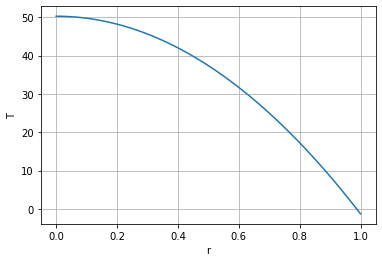

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

x = np.linspace(0, 1, 100)
plt.plot(x, T(x), label='T(r)')

plt.xlabel("r")
plt.ylabel("T")
plt.grid(True)


In [4]:
fr = R_AE**2 / (2 * (P + Q / 2) * ΔT * L_AE)
print("fr = ", fr)

fr =  461.9047619047619


In [5]:
fφ = R_AE**2 / (2 * (P - Q / 2) * ΔT * L_AE)
print("fφ = ", fφ)

fφ =  538.8888888888889


In [6]:
f = (fφ + fr)/2
print("f = ", f)

f =  500.3968253968254


In [7]:
# Для тонкой линзы
M1 = np.matrix([[1, 0.5*L_AE/n_0], [0, 1]]) 
M1 = M1 @ np.matrix([[1, 0], [-1 / f, 1]]) 
M1 = M1 @ np.matrix([[1, 0.5*L_AE/n_0], [0, 1]])
print("M1 =\n", M1)

M1 =
 [[ 9.96715296e-01  3.28191206e+00]
 [-1.99841396e-03  9.96715296e-01]]


In [8]:
npov = n_0 + (P * ΔT / 2) - ( (P + Q / 2) * ΔT)
print("npov = ", npov)

npov =  1.5209431701030929


In [9]:
n2 = 2 * (n_0 - npov)/(R_AE**2)
print("n2 = ", n2)

n2 =  0.00023195876288583314


In [10]:
# Для толстой линзы
M2 = np.matrix([[np.cos(L_AE * np.sqrt(n2/n_0)), 
                 np.sin(L_AE * np.sqrt(n2/n_0) )/np.sqrt(n_0 * n2)], 
                [-np.sin(L_AE * np.sqrt(n2/n_0) )*np.sqrt(n_0 * n2), 
                 np.cos(L_AE * np.sqrt(n2/n_0))]])
print("M2 =\n", M2)

M2 =
 [[ 9.98094304e-01  3.28522251e+00]
 [-1.15905698e-03  9.98094304e-01]]


In [11]:
Lc2 = L_C - L_C1
print("Lc2 = ", Lc2)

Lc2 =  4


In [12]:
Ma = np.matrix([[1, 0], [-2/R1, 1]]) 
Ma = Ma @ np.matrix([[1, L_C1 - 0.5 * L_AE], [0, 1]])
Ma = Ma @ np.matrix([[1, 0.5*L_AE/n_0], [0, 1]])
Ma = Ma @ np.matrix([[1, 0], [-1/f, 1]]) 
Ma = Ma @ np.matrix([[1, 0.5*L_AE/n_0], [0, 1]]) 
Ma = Ma @ np.matrix([[1, Lc2 - 0.5*L_AE], [0, 1]]) 
Ma = Ma @ np.matrix([[1, 0], [-2/R2, 1]]) 
Ma = Ma @ np.matrix([[1, Lc2 - 0.5*L_AE], [0, 1]]) 
Ma = Ma @ np.matrix([[1, 0.5*L_AE/n_0], [0, 1]]) 
Ma = Ma @ np.matrix([[1, 0], [-1/f, 1]]) 
Ma = Ma @ np.matrix([[1, 0.5*L_AE/n_0], [0, 1]]) 
Ma = Ma @ np.matrix([[1, L_C1 - 0.5*L_AE], [0, 1]])
print("Ma =\n", Ma)

Ma =
 [[ 1.04903756 17.02173471]
 [ 0.02688378  1.38947226]]


In [13]:
prov = (Ma[0, 0] + Ma[1, 1])/2
print("prov = ",prov)


prov =  1.2192549081114028


In [14]:
Mb = np.matrix([[1, 0], [0, 1]]) 
Mb = Mb @ np.matrix([[1, 0], [-1/R1, 1]]) 
Mb = Mb @ np.matrix([[1, L_C1 - 0.5 * L_AE], [0, 1]]) 
Mb = Mb @ np.matrix([[1, 0.5*L_AE/n_0], [0, 1]]) 
Mb = Mb @ np.matrix([[1, 0], [-1/f, 1]]) 
Mb = Mb @ np.matrix([[1, 0.5*L_AE/n_0], [0, 1]]) 
Mb = Mb @ np.matrix([[1, Lc2 - 0.5*L_AE], [0, 1]])  
Mb = Mb @ np.matrix([[1, 0], [-1/R2, 1]]) 
Mb = Mb @ np.matrix([[1, 0], [0, 1]]) 
Mb = Mb @ np.matrix([[1, 0], [-1/R2, 1]]) 
Mb = Mb @  np.matrix([[1, Lc2 - 0.5*L_AE], [0, 1]])  
Mb = Mb @ np.matrix([[1, 0.5*L_AE/n_0], [0, 1]]) 
Mb = Mb @ np.matrix([[1, 0], [-1/f, 1]]) 
Mb = Mb @ np.matrix([[1, 0.5*L_AE/n_0], [0, 1]]) 
Mb = Mb @ np.matrix([[1, 0.5*L_AE/n_0], [0, 1]])
print("Mb =\n", Mb)
proverk = (Mb[0, 0] + Mb[1, 1])/2
print("proverk = ", proverk)


Mb =
 [[ 1.04903756 15.07435959]
 [ 0.01639341  1.1888231 ]]
proverk =  1.1189303306467075


In [15]:
Lz = L_C1 + L_C1 - L_C1**2 / f
g1 = 1 - Lz/R1 - L_C1/f
g2 = 1 - Lz/R2 - L_C1/f
print("Lz = ", Lz)
print("g1 = ", g1)
print("g2 = ", g2)
print("g1 * g2 = ", g1 * g2)

Lz =  11.928057097541634
g1 =  1.1072900872323552
g2 =  1.0476498017446472
g1 * g2 =  1.16005224036279


In [16]:
Mar = np.matrix([[1, 0], [-2/R1, 1]]) 
Mar = Mar @ np.matrix([[1, L_C1], [0, 1]]) 
Mar = Mar @ np.matrix([[1, 0], [-1/fr, 1]]) 
Mar = Mar @ np.matrix([[1, L_C1], [0, 1]]) 
Mar = Mar @ np.matrix([[1, 0], [-2/R2, 1]]) 
Mar = Mar @ np.matrix([[1, L_C1], [0, 1]])  
Mar = Mar @ np.matrix([[1, 0], [-1/fr, 1]]) 
Mar = Mar @ np.matrix([[1, L_C1], [0, 1]])  
Mar = Mar @ np.matrix([[1, 0], [-2/R1, 1]]) 
print("Mar =\n", Mar)

Mar =
 [[ 1.56516571 24.95575151]
 [ 0.05809257  1.56516571]]


In [17]:
R11r = (1/R2 - np.sqrt(Mar[1,0] * Mar[1,1]/(Mar[0,0]*Mar[0,1])))**-1
R12r = (1/R2 + np.sqrt(Mar[1,0] * Mar[1,1]/(Mar[0,0]*Mar[0,1])))**-1

print("R11r = ", R11r)
print("R12r = ", R12r)

R11r =  -18.780218619097088
R12r =  23.122715057581836


In [18]:
μ1r = Mar[0,0] * Mar[1,1] + Mar[0, 1] * Mar[1,0] + 2 * np.sqrt(Mar[0,0] * Mar[1,1] * Mar[0,1]*Mar[1,0])
μ2r = Mar[0,0] * Mar[1,1] + Mar[0, 1] * Mar[1,0] - 2 * np.sqrt(Mar[0,0] * Mar[1,1] * Mar[0,1]*Mar[1,0])
print("μ1r = ", μ1r)
print("μ2r = ", μ2r)

μ1r =  7.668572444225642
μ2r =  0.13040236722976895


In [19]:
Maφ = np.matrix([[1, 0], [-2/R1, 1]]) 
Maφ = Maφ @ np.matrix([[1, L_C1], [0, 1]]) 
Maφ = Maφ @ np.matrix([[1, 0], [-1/fφ, 1]]) 
Maφ = Maφ @ np.matrix([[1, L_C1], [0, 1]]) 
Maφ = Maφ @ np.matrix([[1, 0], [-2/R2, 1]]) 
Maφ = Maφ @ np.matrix([[1, L_C1], [0, 1]])  
Maφ = Maφ @ np.matrix([[1, 0], [-1/fφ, 1]]) 
Maφ = Maφ @ np.matrix([[1, L_C1], [0, 1]])  
Maφ = Maφ @ np.matrix([[1, 0], [-2/R1, 1]]) 
print("Maφ =\n", Maφ)

Maφ =
 [[ 1.57420865 25.02467449]
 [ 0.05906702  1.57420865]]


In [20]:
R11φ = (1/R2 - np.sqrt(Maφ[1,0] * Maφ[1,1]/(Maφ[0,0]*Maφ[0,1])))**-1
R12φ = (1/R2 + np.sqrt(Maφ[1,0] * Maφ[1,1]/(Maφ[0,0]*Maφ[0,1])))**-1

print("R11φ = ", R11φ)
print("R12φ = ", R12φ)

R11φ =  -18.66248070579487
R12φ =  22.94449212090056


In [21]:
μ1φ = Maφ[0,0] * Maφ[1,1] + Maφ[0, 1] * Maφ[1,0] + 2 * np.sqrt(Maφ[0,0] * Maφ[1,1] * Maφ[0,1]*Maφ[1,0])
μ2φ = Maφ[0,0] * Maφ[1,1] + Maφ[0, 1] * Maφ[1,0] - 2 * np.sqrt(Maφ[0,0] * Maφ[1,1] * Maφ[0,1]*Maφ[1,0])
print("μ1φ = ", μ1φ)
print("μ2φ = ", μ2φ)

μ1φ =  7.78406395330351
μ2φ =  0.1284675981593919


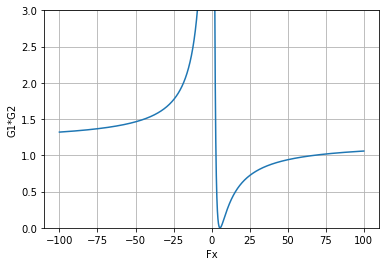

In [22]:
G1 = lambda Fx: 1 - Lz/R1 - L_C1/Fx
G2 = lambda Fx: 1 - Lz/R2 - L_C1/Fx

Fx = np.linspace(-100, 100, 10000)
plt.plot(Fx, G1(Fx) * G2(Fx), label='G1(Fx)*G2(Fx)')

plt.ylim(0, 3)
plt.xlabel("Fx")
plt.ylabel("G1*G2")
plt.grid(True)